In [47]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

the graph contains 7 nodes and 12 edges

node list
['red', 'green', 'blue', 'yellow', 'magenta', 'cyan', 'white']

edge list
[('red', 'yellow'), ('red', 'magenta'), ('red', 'white'), ('green', 'yellow'), ('green', 'cyan'), ('green', 'white'), ('blue', 'magenta'), ('blue', 'cyan'), ('blue', 'white'), ('yellow', 'white'), ('magenta', 'white'), ('cyan', 'white')]

neighbors of white
['red', 'blue', 'green', 'magenta', 'cyan', 'yellow']

degree of each node
[('red', 3), ('green', 3), ('blue', 3), ('yellow', 3), ('magenta', 3), ('cyan', 3), ('white', 6)]


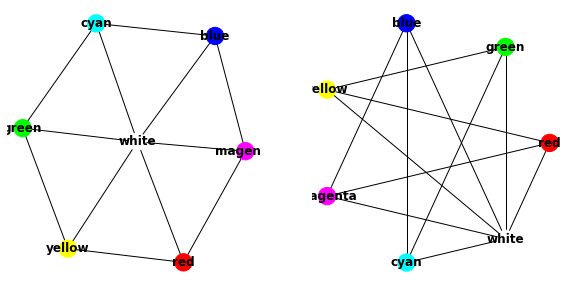

In [106]:
## as an example, I'm gonna construct a graph of primary 
## and secondary colors

# instantiate an empty graph
g = nx.Graph()

# add single nodes, with attributes
# node value can be any value, I'll use color names
g.add_node('red', rgb=[1,0,0])
g.add_node('green', rgb=[0,1,0])
g.add_node('blue', rgb=[0,0,1])

# add multiple nodes
g.add_nodes_from([
    ('yellow', {'rgb': [1,1,0]}),
    ('magenta', {'rgb': [1,0,1]}),
    ('cyan', {'rgb': [0,1,1]}),
    ('white')
])

# attributes can be set after the fact too
g.nodes['white']['rgb'] = [1,1,1]

# add edges 
g.add_edge('red','yellow')
g.add_edge('green','yellow')

# add multiple edges
g.add_edges_from([
    ('red', 'magenta'),
    ('blue', 'magenta'),
    ('blue', 'cyan'),
    ('green', 'cyan'),
    ('red', 'white'),
    ('blue', 'white'),
    ('green', 'white'),
    ('magenta', 'white'),
    ('cyan', 'white'),
    ('yellow', 'white')
])

print('the graph contains ' + str(g.number_of_nodes()) \
      + ' nodes and ' + str(g.number_of_edges()) \
      + ' edges')

print('\nnode list')
print(list(g.nodes))
print('\nedge list')
print(list(g.edges))
print('\nneighbors of white')
print(list(g.neighbors('white')))
print('\ndegree of each node')
print(list(g.degree))
# there's a ton of other metrics nx can compute on your graph

# grab the rgb attribute of each node, and use it to 
# populate the colormap
cmap = []
for node in g.nodes:
    cmap.append(g.nodes[node]['rgb'])

fig, axes = plt.subplots(1, 2, figsize=(10,5))
plt.sca(axes[0]) # set current axis
nx.draw(g, with_labels=True, node_color=cmap, font_weight='bold')
plt.sca(axes[1])
nx.draw_shell(g, with_labels=True, node_color=cmap, font_weight='bold')